In [1]:
%pip install --upgrade numpy

import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns

img = cv.imread("Lab1.png")
rows, cols = img.shape[:2]

  Using cached numpy-2.2.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.2.2-cp311-cp311-macosx_14_0_arm64.whl (5.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.2.2 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.2 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.1 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, b

In [2]:
#Task1

linear = cv.resize(img, None, fx=1.5, fy=1.5, interpolation=cv.INTER_LINEAR) 
cv.imshow("Linear" , linear)

cv.waitKey(0)
cv.destroyAllWindows()

2025-01-27 09:42:30.908 Python[73742:1359037] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-27 09:42:30.908 Python[73742:1359037] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [3]:
nearest = cv.resize(img, None, fx=1.5, fy=1.5 , interpolation=cv.INTER_NEAREST)
cv.imshow("Nearest Neighbor" , nearest)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:


box_blur = cv.blur(img, (25, 25))

cv.imshow("Box Blur" , box_blur)
cv.waitKey(0)
cv.destroyAllWindows()

gaussian = cv.GaussianBlur(img, (19,19), 0)
cv.imshow("Gaussian Blur" , gaussian)
cv.waitKey(0)
cv.destroyAllWindows()

adaptive = cv.bilateralFilter(img, d=59, sigmaColor=75, sigmaSpace=75)
cv.imshow("Adaptive Blur", adaptive)
cv.waitKey(0)
cv.destroyAllWindows()


In [5]:
#Task 2
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay, roc_auc_score

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype('int')
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_oh = tf.keras.utils.to_categorical(y_test, num_classes=10)

ann_model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)), 
    Dropout(0.2),
    Dense(256, activation='relu'),                     
    Dropout(0.2),
    Dense(10, activation='softmax')              
])

ann_model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

ann_model.fit(X_train.values, y_train_oh, epochs=10, batch_size=128, verbose=2)

y_proba_ann = ann_model.predict(X_test.values)
y_pred_ann = y_proba_ann.argmax(axis=1)


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
438/438 - 2s - 4ms/step - accuracy: 0.9174 - loss: 0.2713
Epoch 2/10
438/438 - 1s - 3ms/step - accuracy: 0.9665 - loss: 0.1096
Epoch 3/10
438/438 - 1s - 3ms/step - accuracy: 0.9768 - loss: 0.0757
Epoch 4/10
438/438 - 1s - 3ms/step - accuracy: 0.9808 - loss: 0.0588
Epoch 5/10
438/438 - 1s - 3ms/step - accuracy: 0.9846 - loss: 0.0484
Epoch 6/10
438/438 - 1s - 3ms/step - accuracy: 0.9874 - loss: 0.0392
Epoch 7/10
438/438 - 1s - 3ms/step - accuracy: 0.9890 - loss: 0.0341
Epoch 8/10
438/438 - 1s - 3ms/step - accuracy: 0.9892 - loss: 0.0304
Epoch 9/10
438/438 - 1s - 3ms/step - accuracy: 0.9906 - loss: 0.0286
Epoch 10/10
438/438 - 1s - 3ms/step - accuracy: 0.9910 - loss: 0.0272
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step


In [8]:
print("Model evaluation of random forest: ")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision: ", precision)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall: ", recall)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score: ", f1)

Model evaluation of random forest: 
Accuracy: 0.9671
Precision:  0.9671561515620307
Recall:  0.9671428571428572
F1 Score:  0.9671348262202857


In [9]:
print("Model evaluation of ANN: ")

accuracy = accuracy_score(y_test, y_pred_ann)
print(f"Accuracy: {accuracy:.4f}")
    
# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_ann, average='weighted')
print("Precision: ", precision)
recall = recall_score(y_test, y_pred_ann, average='weighted')
print("Recall: ", recall)
f1 = f1_score(y_test, y_pred_ann, average='weighted')
print("F1 Score: ", f1)

Model evaluation of ANN: 
Accuracy: 0.9804
Precision:  0.9805229467077445
Recall:  0.9804285714285714
F1 Score:  0.980425103860645


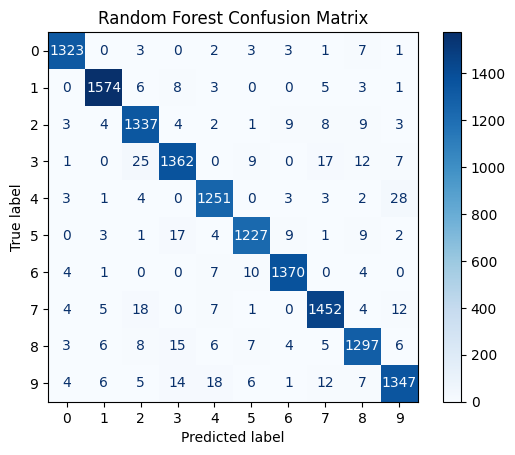

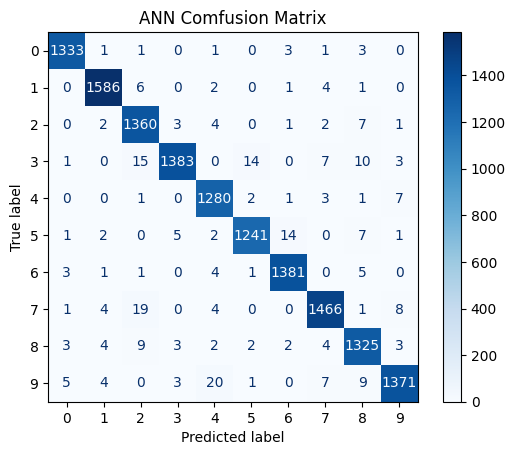

In [10]:


# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm_rf, display_labels=range(10)).plot(cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

# ANN Confusion Matrix
cm_ann = confusion_matrix(y_test, y_pred=y_pred_ann)
ConfusionMatrixDisplay(cm_ann, display_labels=range(10)).plot(cmap="Blues")
plt.title("ANN Comfusion Matrix")
plt.show()


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step


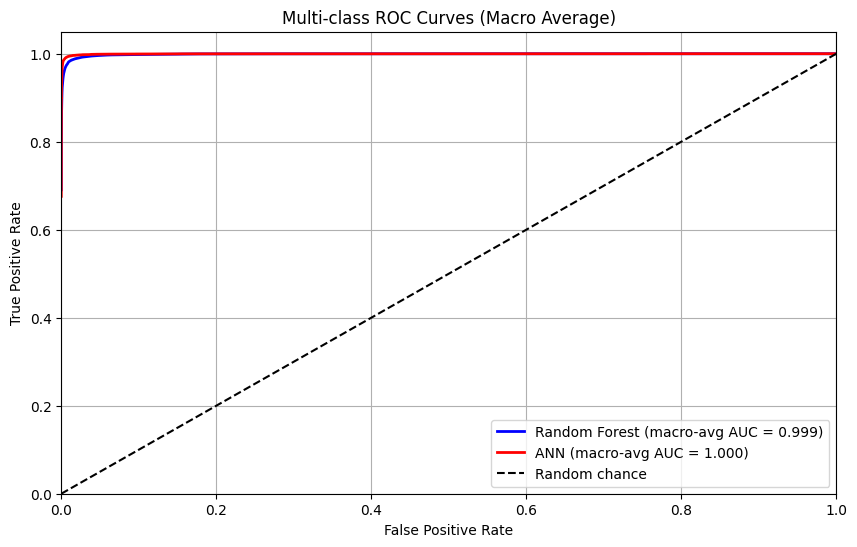

In [15]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

def plot_multiclass_roc(y_test, y_proba_rf, y_proba_ann, n_classes=10):
   

    if not (0 <= y_proba_rf.all() <= 1) or not (0 <= y_proba_ann.all() <= 1):
        raise ValueError("Probability predictions must be between 0 and 1")
        
  
    y_proba_rf = y_proba_rf / y_proba_rf.sum(axis=1)[:, np.newaxis]
    y_proba_ann = y_proba_ann / y_proba_ann.sum(axis=1)[:, np.newaxis]
    

    y_test_bin = label_binarize(y_test, classes=range(n_classes))
    
    fpr = {'rf': dict(), 'ann': dict()}
    tpr = {'rf': dict(), 'ann': dict()}
    roc_auc = {'rf': dict(), 'ann': dict()}
    
    
    for i in range(n_classes):
        # Random Forest
        fpr['rf'][i], tpr['rf'][i], _ = roc_curve(y_test_bin[:, i], y_proba_rf[:, i]) 
        roc_auc['rf'][i] = auc(fpr['rf'][i], tpr['rf'][i])
        
        # ANN
        fpr['ann'][i], tpr['ann'][i], _ = roc_curve(y_test_bin[:, i], y_proba_ann[:, i])
        roc_auc['ann'][i] = auc(fpr['ann'][i], tpr['ann'][i])
    
    # Calculate macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr['rf'][i] for i in range(n_classes)] +
                                     [fpr['ann'][i] for i in range(n_classes)]))
    
    mean_tpr = {
        'rf': np.zeros_like(all_fpr),
        'ann': np.zeros_like(all_fpr)
    }
    
    for i in range(n_classes):
        for model in ['rf', 'ann']:
            mean_tpr[model] += np.interp(all_fpr, fpr[model][i], tpr[model][i])
    
    for model in ['rf', 'ann']:
        mean_tpr[model] /= n_classes
    
    # Plot curves
    plt.figure(figsize=(10, 6))
    
    # Plot average ROC curves
    plt.plot(all_fpr, mean_tpr['rf'],
             label=f'Random Forest (macro-avg AUC = {np.mean(list(roc_auc["rf"].values())):.3f})',
             color='blue', linewidth=2)
    
    plt.plot(all_fpr, mean_tpr['ann'],
             label=f'ANN (macro-avg AUC = {np.mean(list(roc_auc["ann"].values())):.3f})',
             color='red', linewidth=2)
    
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC Curves (Macro Average)')
    plt.legend(loc='lower right')
    plt.grid(True)
    
    return plt

# Example usage:
# Make sure your probability arrays are properly formatted
y_proba_rf = rf_model.predict_proba(X_test)  # Shape: (n_samples, n_classes)
y_proba_ann = ann_model.predict(X_test) # Shape: (n_samples, n_classes)

plot_multiclass_roc(y_test, y_proba_rf, y_proba_ann)
plt.show()